<a href="https://colab.research.google.com/github/toni-ramchandani/AIMasterClassTTT/blob/main/Section1_6_Introduction_to_AI_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

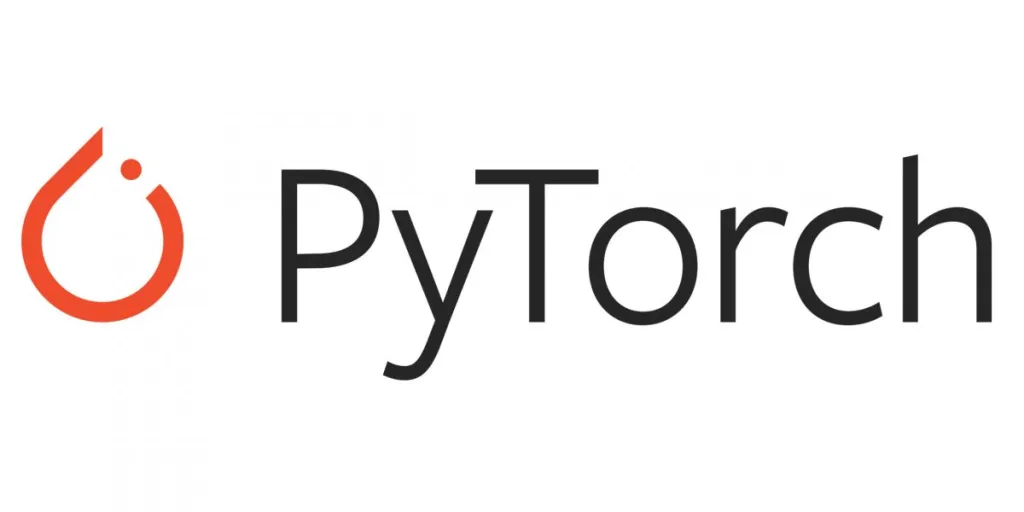

### **PyTorch: History and Core Concepts**

**1. History of PyTorch**

PyTorch was developed by Facebook's AI Research lab (FAIR) and released in 2016. The framework evolved from Torch, a scientific computing library with strong GPU support. Facebook designed PyTorch to address Torch’s limitations, specifically adding Pythonic syntax and a dynamic computation graph. This made it easier for researchers and practitioners to work directly in Python, one of the most widely used languages in data science. By 2017, PyTorch gained popularity within the AI community due to its user-friendly API, flexibility, and rapid adaptability for research needs.

**2. Key Concepts in PyTorch**

- **Tensors**: The core data structure in PyTorch, similar to NumPy arrays, used for storing data in multiple dimensions. Tensors in PyTorch are optimized for GPU, making them faster for large computations.

- **Dynamic Computation Graph (Define-by-Run)**: Unlike some frameworks that use static graphs (Define-and-Run), PyTorch uses a dynamic graph, allowing the graph to be defined as code executes. This enables real-time debugging and allows changes to model structure during runtime, making it ideal for experimentation and research.

- **Autograd (Automatic Differentiation)**: PyTorch’s autograd module enables automatic differentiation, meaning it can compute gradients automatically, which is essential for optimizing neural networks. With autograd, PyTorch tracks tensor operations to create a computational graph for calculating derivatives.

- **Torch.nn (Neural Network Module)**: The `torch.nn` module provides pre-built components for neural networks, including layers (e.g., Linear, Conv2D), loss functions, and activation functions. Models are built by defining subclasses of `nn.Module`, making it modular and easy to customize.

- **Optimizers**: PyTorch includes various optimizers such as SGD and Adam within the `torch.optim` package, enabling effective model training and weight updates.

- **Data Management with Datasets and DataLoaders**: PyTorch simplifies data handling through its `torch.utils.data.Dataset` and `DataLoader` classes. This feature enables efficient data loading, batching, and shuffling, essential for large datasets.

- **GPU Acceleration**: PyTorch tensors can be seamlessly moved to GPUs with `.to('cuda')`, allowing for faster computation, especially with large models and datasets.

- **TorchVision, TorchText, and TorchAudio**: PyTorch offers libraries for specialized tasks, such as TorchVision for computer vision, TorchText for NLP, and TorchAudio for audio processing. These libraries provide pre-trained models, datasets, and utilities tailored to their domains.

**3. PyTorch Ecosystem and Applications**

- **Research**: PyTorch’s flexibility and support for dynamic graphs make it a go-to for AI research. It’s especially popular in natural language processing, computer vision, and generative models.
  
- **Production-Ready with TorchServe**: TorchServe enables efficient deployment of PyTorch models in production. It supports REST APIs, metrics, and scaling capabilities.

- **PyTorch Lightning and Hugging Face Integration**: PyTorch Lightning standardizes PyTorch code, improving readability and scalability. Integration with Hugging Face’s Transformers library also allows for easy access to pre-trained NLP models.

- **Interoperability**: PyTorch models can be converted to the Open Neural Network Exchange (ONNX) format, making it compatible with other frameworks and suitable for deployment on various platforms.

**4. Popular Use Cases**

- **Computer Vision**: With libraries like TorchVision, PyTorch is widely used for tasks like object detection, image classification, and segmentation.
- **Natural Language Processing (NLP)**: Hugging Face’s Transformers library, built on PyTorch, has made PyTorch highly popular in NLP.
- **Generative Models**: PyTorch is frequently used for Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs), enabling tasks like image synthesis and style transfer.

PyTorch’s history and development highlight its commitment to providing a flexible, research-friendly framework that has grown into a powerful tool for both research and industry applications in deep learning. Its robust ecosystem and intuitive design continue to make it a leading choice for machine learning and AI development.




---


---




### 1. **Basic Tensor Operations**

```python
import torch

# Create two tensors
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Basic operations
print("Addition:\n", a + b)
print("Element-wise multiplication:\n", a * b)
```

### 2. **Simple Neural Network for Classification**

```python
import torch.nn as nn
import torch.optim as optim

# Define a simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Instantiate model, loss, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Synthetic dataset for training
data = torch.tensor([[1, 2], [2, 3], [3, 4]], dtype=torch.float32)
labels = torch.tensor([0, 1, 0], dtype=torch.float32).view(-1, 1)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
```

### 3. **Convolutional Neural Network (CNN) for Image Classification**

```python
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)  # Convolutional layer
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 32 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the CNN model
cnn_model = CNN()
print(cnn_model)
```

### 4. **Transfer Learning with a Pre-trained Model (ResNet)**

```python
import torchvision.models as models

# Load a pre-trained ResNet model and modify for a custom task
resnet = models.resnet18(pretrained=True)
resnet.fc = nn.Linear(resnet.fc.in_features, 5)  # Modify output layer for 5 classes
print(resnet)
```

These examples showcase basic tensor operations, a simple neural network, a CNN for image classification, and a transfer learning setup with a pre-trained model. These foundational examples provide an overview of PyTorch's versatility in building and training deep learning models.

In [1]:
import torch

# Create two tensors
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Basic operations
print("Addition:\n", a + b)
print("Element-wise multiplication:\n", a * b)

Addition:
 tensor([[ 6.,  8.],
        [10., 12.]])
Element-wise multiplication:
 tensor([[ 5., 12.],
        [21., 32.]])


In [2]:
import torch.nn as nn
import torch.optim as optim

# Define a simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Instantiate model, loss, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Synthetic dataset for training
data = torch.tensor([[1, 2], [2, 3], [3, 4]], dtype=torch.float32)
labels = torch.tensor([0, 1, 0], dtype=torch.float32).view(-1, 1)

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 20, Loss: 0.6386
Epoch 40, Loss: 0.6384
Epoch 60, Loss: 0.6384
Epoch 80, Loss: 0.6383
Epoch 100, Loss: 0.6383


In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)  # Convolutional layer
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 32 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the CNN model
cnn_model = CNN()
print(cnn_model)


CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [4]:
import torchvision.models as models

# Load a pre-trained ResNet model and modify for a custom task
resnet = models.resnet18(pretrained=True)
resnet.fc = nn.Linear(resnet.fc.in_features, 5)  # Modify output layer for 5 classes
print(resnet)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  



---



---



**PyTorch** vs **TensorFlow**

| **Feature**               | **PyTorch**                                                                                                  | **TensorFlow**                                                                                                  |
|---------------------------|-------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| **Computation Graph**     | Dynamic (Define-by-Run); allows modification during runtime, ideal for research                              | Static (Define-and-Run); optimized for deployment, though TF 2.x added eager execution                          |
| **Ease of Use**           | Pythonic, intuitive, simpler for debugging and prototyping                                                  | Steeper learning curve, especially in TF 1.x; TF 2.x improved usability                                        |
| **Performance**           | Fast on both CPU and GPU, but performance can vary with complex models                                      | High performance, especially with TF Serving and TPU support                                                    |
| **Deployment**            | Less production-ready out-of-the-box, but options exist (TorchServe)                                        | Strong production ecosystem with TF Serving, TFX, and TensorFlow Lite                                           |
| **Community and Support** | Strong in research and academia; widely used for experimentation                                            | Extensive community and industry adoption; commonly used in production environments                             |
| **Debugging**             | Easier to debug with dynamic graphs and PyTorch’s native support for Python tools                            | Debugging improved with TF 2.x and Eager Execution; previously challenging with static graphs                  |
| **Ecosystem**             | Includes libraries like TorchVision, TorchText, and TorchAudio for specialized tasks                        | Extensive ecosystem, including TensorFlow Hub, TensorFlow Extended (TFX), and TensorFlow Lite for mobile        |
| **Deployment Tools**      | Supports ONNX export and TorchScript for model deployment                                                   | Offers TensorFlow Lite, TensorFlow.js, and TensorFlow Serving for seamless deployment across platforms          |
| **Hardware Compatibility**| Good support for CPUs and GPUs                                                                              | Optimized for CPUs, GPUs, and TPUs, making it better suited for large-scale distributed training               |
| **Popular Use Cases**     | Research, prototyping, dynamic models, and NLP (Hugging Face)                                               | Production, large-scale machine learning pipelines, and mobile AI                                              |

### Summary:
- **PyTorch** is favored for research, experimentation, and rapid prototyping due to its flexibility and intuitive design.
- **TensorFlow** is preferred for production, scaling, and deployment, especially with its mature ecosystem and diverse hardware support.

Each framework is powerful, and the best choice often depends on project requirements and the specific stage of development.